<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 MDD

#### Preamble: Note on writing reports, using reference material, AI and other tools
* Write a report
* Add sources for code and biblography
* If using ChatGPT -> do cite it properly and include (if possible) your questions and answers as an addition to the report.

#### Goal for the project: Regression analysis and resampling methods

* Look at regression methods -> the Ordinary Least Squares (OLS) method.
* Give you an experience in writing scientific reports.


Before jumping on two-dimensionam function
1. Test with one-dimentional first -> like week 35 and week 36
2. A simple test, as discussed during the lectures the first
three weeks is to set the design matrix equal to the identity
matrix.
3.  Then your model should give a mean square error which is exactly equal to zero.
When you are sure that your codes function well, you can then replace
the one-dimensional test function with the two-dimensional **Franke** function
discussed here.

Note: The Franke function serves as a stepping stone towards the analysis of
real topographic data. The latter is the last part of this project.

### Description of two-dimensional function
Task:
* Look at how to fit polynomials to a specific
two-dimensional function called Franke's
function. Used a lot for interpolation and fitting algorithms. F
* For validation and testing ->  resamling techniques such as cross-validation and/or bootstrap  
* Look more closely at Bias-Variance trade off.

The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  In a sense, our data are thus scaled to a particular domain for the input values.


#### Task:

1. Perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and a $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as a
resampling technique.  After that we will include the cross-validation
technique.

We can
use a uniform distribution to set up the arrays of values for $x$ and
$y$, or as in the example below just a set of fixed values for $x$ and
$y$ with a given step size.  We will fit a function (for example a
polynomial) of $x$ and $y$.  Thereafter we will repeat much of the
same procedure using the Ridge and Lasso regression methods,
introducing thus a dependence on the bias (penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

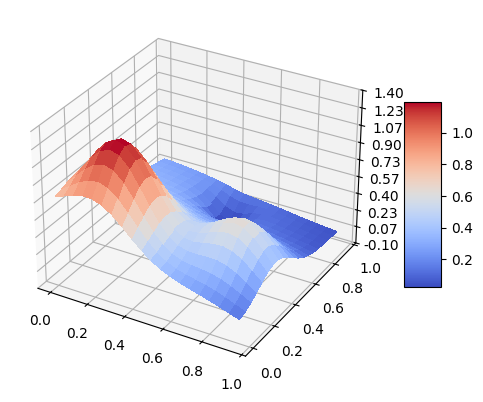

In [475]:
%matplotlib inline
#Code given in the assignment
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

If you wish to compare your results with other on the Franke function or other popular functions tested with linear regression, see the list in Figure 1 of the article by Cook et al at <https://arxiv.org/abs/2401.11694>.

### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)
and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree five).
Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.
 An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35 and week 36.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

### 1a) Solution

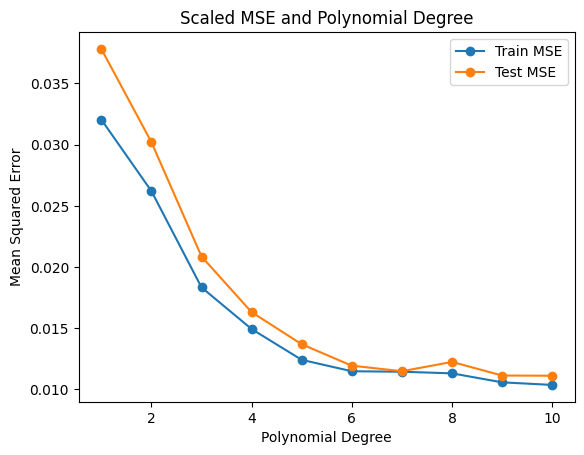

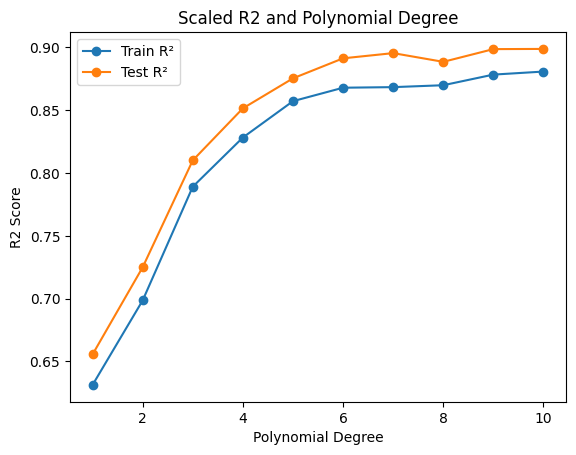

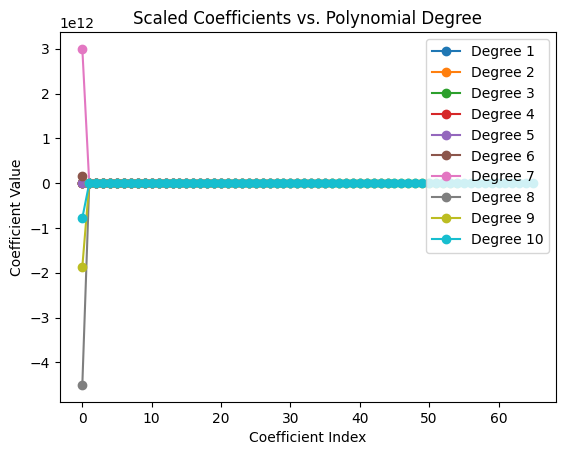

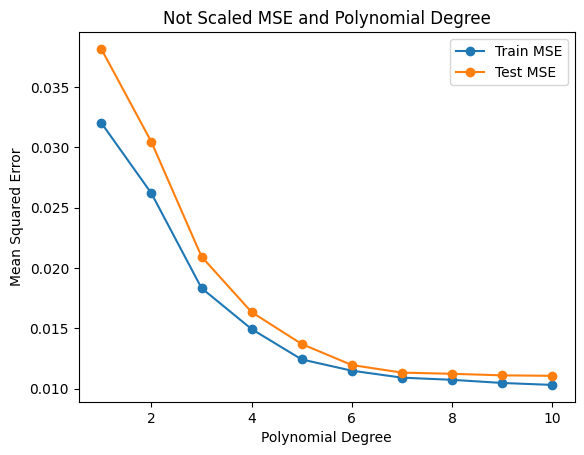

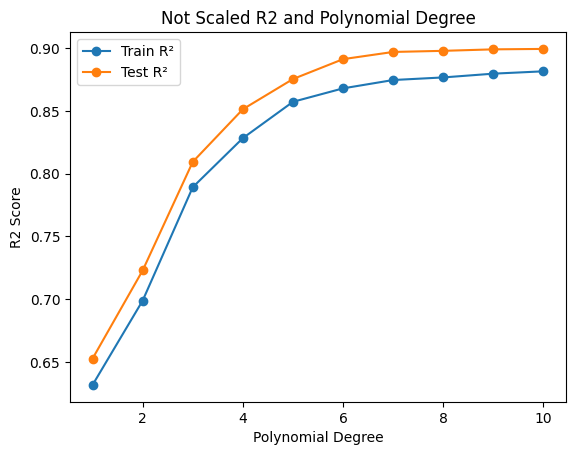

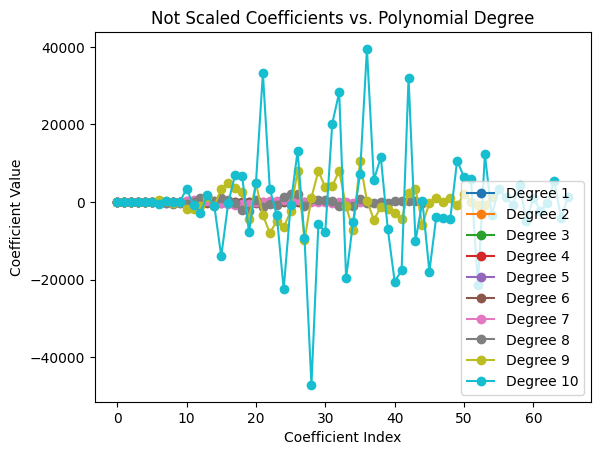

In [476]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Task 1
""" 
1. Generate data for frankefunction  -> should explore stochastic noise using the normal distribution
2. Perform standard OLS using polynomials x, y up to 5th order
3. Evaluate MSE and R2
4. Plot MSE and R2 as functions of the polynomial degree (here up to polymial degree five).
    Also plot the paramets B as you increase.

Notes:
Should include 
* scaling/centring of the data
    * You should present a critical discussion of why and how you have scaled or not scaled the data.
* Split into train and test data
    * No answer, but an accepted rule of thumb is to use approximately to 2/5 to 4/5 of the data as training data.

*   Reuse from week 34/35 and scaling
"""

# Week 36 
# 1. Generate data:
n = 1000
np.random.seed(2024)  
x = np.random.rand(n, 1) #creating data
y = np.random.rand(n, 1)
z = FrankeFunction(x, y)  + 0.1 * np.random.randn(n, 1) # adding some noise using the normmal distribution N(0,1)

mse_train, mse_test, r2_train, r2_test, coefficients = [], [], [], [], []

degrees = np.arange(1, 11)

for poly_degree in degrees:

    #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform
    #"Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree"
    poly = PolynomialFeatures(degree=poly_degree)
   
    # https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    #Creates the design matix. fit_transfrom -> Fits the data to the 2d data array
    XY = np.c_[x, y] #Creating a two-dimentional array with both x and y
    XY = poly.fit_transform(XY)

    # Scaling the data
    # Scale the data by subtracting the mean value from each column in the design matrix
    scaler_XY = StandardScaler(with_mean=True, with_std=False)
    scaler_Z = StandardScaler(with_mean=True, with_std=False)
    XY_scaled = scaler_XY.fit_transform(XY)
    z_scaled = scaler_Z.fit_transform(z)

    # Splitting the data
    XY_train, XY_test, z_train, z_test = train_test_split(XY_scaled, z_scaled, test_size=0.2, random_state=0)

    ols_model = LinearRegression(fit_intercept=False)
    ols_model.fit(XY_train, z_train)

    z_train_pred = ols_model.predict(XY_train)
    z_test_pred = ols_model.predict(XY_test)

    # 3. MSE and R2
    mse_train.append(mean_squared_error(z_train, z_train_pred))
    mse_test.append(mean_squared_error(z_test, z_test_pred))
    r2_train.append(r2_score(z_train, z_train_pred))
    r2_test.append(r2_score(z_test, z_test_pred))
    # Extract the coef -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    coefficients.append(ols_model.coef_)

# 4. Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree five).
# Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

# Plotting MSE
plt.plot(degrees, mse_train, 'o-', label='Train MSE')
plt.plot(degrees, mse_test, 'o-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Scaled MSE and Polynomial Degree')
plt.legend()
plt.show()

# Plotting R2
plt.plot(degrees, r2_train, 'o-', label='Train R²')
plt.plot(degrees, r2_test, 'o-', label='Test R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Scaled R2 and Polynomial Degree')
plt.legend()
plt.show()

# Coeffiencts - litt usikker her: Denne ble litt gal
for i, coef in enumerate(coefficients):
    plt.plot(coef.flatten(), 'o-', label=f'Degree {degrees[i]}')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Scaled Coefficients vs. Polynomial Degree')
plt.legend()
plt.show()


mse_train, mse_test, r2_train, r2_test, coefficients = [], [], [], [], []
# Non-scaled
for poly_degree in degrees:

    poly = PolynomialFeatures(degree=poly_degree)
    #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform
    # https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    # From 1d to 2d 
    #Design matix
    XY = poly.fit_transform(np.c_[x, y]) #Creating a two-dimentional polynomial with both x and y

    # Scaling the data
    # Scale the data by subtracting the mean value from each column in the design matrix
   # scaler = StandardScaler(with_mean=True, with_std=False)
    XY_scaled = XY #scaler.fit_transform(XY)

    # Splitting the data
    XY_train, XY_test, z_train, z_test = train_test_split(XY_scaled, z, test_size=0.2, random_state=0)

    ols_model = LinearRegression(fit_intercept=False)
    ols_model.fit(XY_train, z_train)

    z_train_pred = ols_model.predict(XY_train)
    z_test_pred = ols_model.predict(XY_test)

    # 3. MSE and R2
    mse_train.append(mean_squared_error(z_train, z_train_pred))
    mse_test.append(mean_squared_error(z_test, z_test_pred))
    r2_train.append(r2_score(z_train, z_train_pred))
    r2_test.append(r2_score(z_test, z_test_pred))
    # Extract the coef -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    coefficients.append(ols_model.coef_)
   # print(poly_degree)
    #print(mse_train)
    #print(mse_test)

# 4. Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree five).
# Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

# Plotting MSE
plt.plot(degrees, mse_train, 'o-', label='Train MSE')
plt.plot(degrees, mse_test, 'o-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Not Scaled MSE and Polynomial Degree')
plt.legend()
plt.show()

# Plotting R2
plt.plot(degrees, r2_train, 'o-', label='Train R²')
plt.plot(degrees, r2_test, 'o-', label='Test R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Not Scaled R2 and Polynomial Degree')
plt.legend()
plt.show()

# Coeffiencts - litt usikker her:
for i, coef in enumerate(coefficients):
    plt.plot(coef.flatten(), 'o-', label=f'Degree {degrees[i]}')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Not Scaled Coefficients vs. Polynomial Degree')
plt.legend()
plt.show()


#### Comment on the results

MSE and R²: As polynomial degree increases, both training and test MSE decrease, and R² improves, though performance stabilizes around degree 4 or 5. However, there are diminishing returns with higher-degree polynomials, and adding more complexity does not drastically improve performance on the test set.

Coefficients: The large fluctuations in coefficients for higher-degree polynomials signal potential overfitting, as the model becomes more complex and potentially less stable.

In conclusion, polynomial degrees up to 4 or 5 seem to strike a good balance between fit and generalization without overfitting the test data too severely. Beyond that, the increasing instability of coefficients suggests the model becomes more prone to overfitting, even if the training error continues to decrease.



#### Why did we scaled the data

Scaling or centring data is a crucial preprocessing step in many machine learning algorithms, including regression

While the data itself is generated with values between 0 and 1, transforming the data according to the polynomial degree can shift the values, leading to values outside the original range.

Here, scaling plays a crucial role as it standardizes the design matrix. It ensures that the model does not focus only on the large features. As stated in Jupyter notebook 5.6, “If our predictors represent different scales, then it is important to standardize the design matrix (X) by subtracting the mean of each column from the corresponding column and dividing the column by its standard deviation.”



##### Why standard scaler?
"The StandardScaler function in Scikit-Learn ensures that for each feature/predictor we study the mean value is zero and the variance is one (every column in the design/feature matrix)." (taken fron Jupter notebook ch 3.13) As we are looking at regression models, using a scaler that affects the features equally is beneficial as it prevents the larger values from dominating. This also improves upon the performance of the model

In addition, we know that the data has an uniform data distribution, so the drawback of standard scaler(does not ensure a min/max of the data),  is not that big of a concern.


##### Looking at the results
When plotting the scaled and non-scaled data we can see a clear difference. When the data is not scaled the MSE-error and R2 score of the training and test data are about the same, however when scaled there is a clear gap. 


Without scaling, the test and train errors are much closer, meaning the model generalizes more similarly to how it performs on the training data. This can make it seem like the model has better generalization, but what may actually be happening is that without scaling, the model struggles to capture the complexity of the data, which can mask overfitting tendencies. 

not scaling could potentially lead to underfitting, where the model fails to capture key patterns due to the disparity in feature magnitudes, causing it to treat all features as equally important, regardless of their actual scale or relevance.




### Part b): Adding Ridge regression for  the Franke function

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. The lecture notes from week 35 and 36 contain more information. Furthermore, the numerical exercise from week 36 is something you can reuse here.

Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and
analyze your results with those obtained in part a) with the ordinary least squares method. Study the
dependence on $\lambda$.

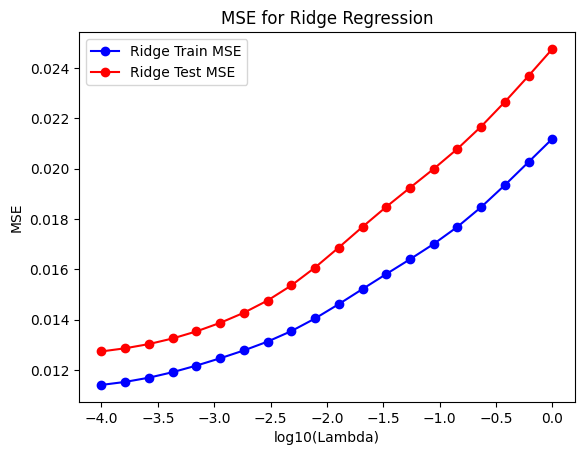

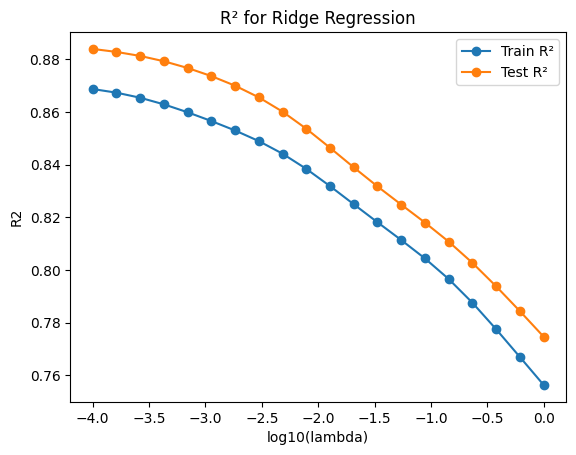

In [477]:
# Week 36
from sklearn.linear_model import Ridge

mse_train_ridge, mse_test_ridge, r2_train_ridge, r2_test_ridge = [], [], [], []
lambdas = np.logspace(-4, 0, 20)

scaler_XY = StandardScaler(with_mean=True, with_std=False)
scaler_Z = StandardScaler(with_mean=True, with_std=False)
XY_scaled = scaler_XY.fit_transform(XY)
z_scaled = scaler_Z.fit_transform(z)

#split
XY_train, XY_test, z_train, z_test = train_test_split(XY_scaled, z_scaled, test_size=0.2, random_state=0)

for i in lambdas:
    ridge_model = Ridge(alpha=i, fit_intercept=False)
    ridge_model.fit(XY_train, z_train)

    z_train_pred_ridge = ridge_model.predict(XY_train)
    z_test_pred_ridge = ridge_model.predict(XY_test)

    mse_train_ridge.append(mean_squared_error(z_train, z_train_pred_ridge))
    mse_test_ridge.append(mean_squared_error(z_test, z_test_pred_ridge))
    r2_train_ridge.append(r2_score(z_train, z_train_pred_ridge))
    r2_test_ridge.append(r2_score(z_test, z_test_pred_ridge))

# Plotting MSE vs. Lambda
plt.plot(np.log10(lambdas), mse_train_ridge, 'b-o', label='Ridge Train MSE')
plt.plot(np.log10(lambdas), mse_test_ridge, 'r-o', label='Ridge Test MSE')
plt.xlabel('log10(Lambda)')
plt.ylabel('MSE')
plt.title('MSE for Ridge Regression')
plt.legend()
plt.show()

# Plotting R2
plt.plot(np.log10(lambdas), r2_train_ridge, 'o-', label='Train R²')
plt.plot(np.log10(lambdas), r2_test_ridge, 'o-', label='Test R²')
plt.xlabel('log10(lambda)')
plt.ylabel('R2')
plt.title('R² for Ridge Regression')
plt.legend()
plt.show()



### Analysis
Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and
analyze your results with those obtained in part a) with the ordinary least squares method. Study the
dependence on $\lambda$.



OLS: The OLS method does not include a regularization term, leading to potential overfitting, especially for higher polynomial degrees.

Ridge Regression: By introducing the regularization parameter (\lambda), Ridge regression helps to prevent overfitting, leading to better generalization performance for an optimal range of (\lambda) values.

### Part c): Adding Lasso for the Franke function

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). Keep in mind that the library **Scikit-Learn** excludes the intercept by default. 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.

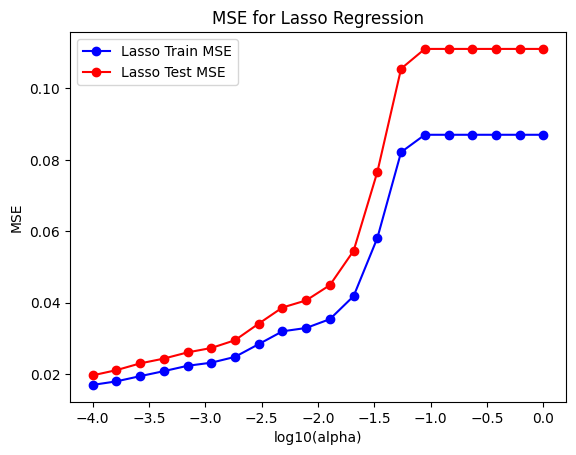

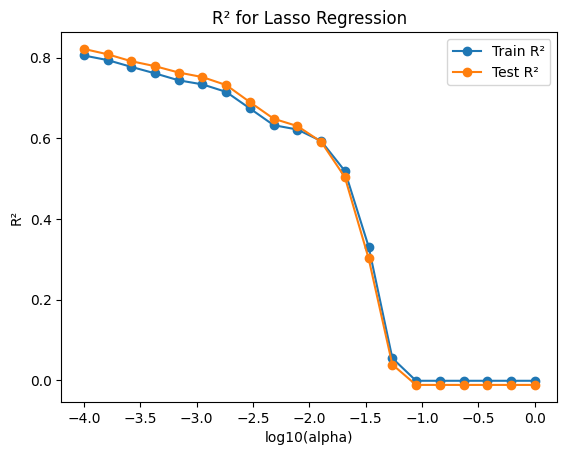

In [478]:
from sklearn.linear_model import Lasso

mse_train_lasso, mse_test_lasso, r2_train_lasso, r2_test_lasso  = [], [], [], []

alphas = np.logspace(-4, 0, 20)

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, fit_intercept=False, max_iter=50000)
    lasso_model.fit(XY_train, z_train)

    z_train_pred_lasso = lasso_model.predict(XY_train)
    z_test_pred_lasso = lasso_model.predict(XY_test)

    mse_train_lasso.append(mean_squared_error(z_train, z_train_pred_lasso))
    mse_test_lasso.append(mean_squared_error(z_test, z_test_pred_lasso))
    r2_train_lasso.append(r2_score(z_train, z_train_pred_lasso))
    r2_test_lasso.append(r2_score(z_test, z_test_pred_lasso))

# Plotting MSE vs. Alpha
plt.plot(np.log10(alphas), mse_train_lasso, 'b-o', label='Lasso Train MSE')
plt.plot(np.log10(alphas), mse_test_lasso, 'r-o', label='Lasso Test MSE')
plt.xlabel('log10(alpha)')
plt.ylabel('MSE')
plt.title('MSE for Lasso Regression')
plt.legend()
plt.show()

plt.plot(np.log10(alphas), r2_train_lasso, 'o-', label='Train R²')
plt.plot(np.log10(alphas), r2_test_lasso, 'o-', label='Test R²')
plt.xlabel('log10(alpha)')
plt.ylabel('R²')
plt.title('R² for Lasso Regression')
plt.legend()
plt.show()

### Discussion
### Give a critical discussion of the three methods and a judgement of which model fits the data best 

For the Franke function, Ridge regression is likely the best choice due to its ability to balance bias and variance, leading to better generalization performance. Lasso can be a good alternative if feature selection is important and the true model is sparse. OLS, while simple, is less robust and more prone to overfitting.

### Part d): Paper and pencil part

### 1 Solution

Used much of the 4.11 section from the Jupyter notebook here:

#### 1a) Expectation value of y given for a given element i
The function of the model is given as: $\boldsymbol{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$, where $\boldsymbol{\varepsilon} \sim N(0, \sigma^2)$ is the normal distributed error.


To calculate the expectation value of y for a given element i:
$$
\mathbb{E}(y_i) = \mathbb{E}( \mathbf{X}_{i, \ast} \boldsymbol{\beta} + \varepsilon_i ) = \mathbf{X}_{i, \ast} \boldsymbol{\beta} + \mathbb{E}(\varepsilon_i) = \mathbf{X}_{i, \ast} \boldsymbol{\beta}
$$
As $\mathbb{E}(\varepsilon_i) = 0$ due to the normal distribution, the expectation simplifies to $\mathbf{X}_{i, \ast} \boldsymbol{\beta}$. 

#### 1b) Variance of y given for a given element i

Variance is how much preditions of y can vary because of the noise in the data.

The variance of a random variable is given by:
$$
\text{Var}(y_i) = \mathbb{E} \left[ (y_i - \mathbb{E}(y_i))^2 \right] = \mathbb{E}(y_i^2) - (\mathbb{E}(y_i))^2
$$

Appling the function $ y_i = \mathbf{X}_{i, \ast} \boldsymbol{\beta} + \varepsilon_i $:
$$
\mathbb{E}(y_i^2) = \mathbb{E} \left[ (\mathbf{X}_{i, \ast} \boldsymbol{\beta} + \varepsilon_i)^2 \right]
$$

Expanding the expression:
$$
\mathbb{E} \left[ (\mathbf{X}_{i, \ast} \boldsymbol{\beta})^2 + 2 \varepsilon_i \mathbf{X}_{i, \ast} \boldsymbol{\beta} + \varepsilon_i^2 \right]
$$

Computing the expectations. Since $ \mathbb{E}(\varepsilon_i) = 0 $, due to the normal distribution and $ \mathbb{E}(\varepsilon_i^2) = \text{Var}(\varepsilon_i) = \sigma^2 $, we get:
$$
\mathbb{E}(y_i^2) = (\mathbf{X}_{i, \ast} \boldsymbol{\beta})^2 + \sigma^2
$$

Subtracting $(\mathbb{E}(y_i))^2 = (\mathbf{X}_{i, \ast} \boldsymbol{\beta})^2 $, we will find the variance:
$$
\text{Var}(y_i) = \sigma^2
$$

#### 1c) Optimal parameters $\hat{\beta}$:
OLS for $\boldsymbol{\hat{\beta}}$ is given by:
$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{y}
$$
Adding $\boldsymbol{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}$ into this equation:
$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}) = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} + (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{\varepsilon}
$$
Taking the expectation of both sides:
$$
\mathbb{E}(\boldsymbol{\hat{\beta}}) = \mathbb{E}\left[ (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} \right] + \mathbb{E}\left[ (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{\varepsilon} \right]
$$
Since $\mathbb{E}(\boldsymbol{\varepsilon}) = 0$, we get:
$$
\mathbb{E}(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta}
$$

#### 1d) Variance of $\beta$:
Using the OLS formula:
$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$
The variance of $\boldsymbol{\hat{\beta}}$ is given by:
$$
\text{Var}(\boldsymbol{\hat{\beta}}) = \text{Var}\left( (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{y} \right)
$$
Since $\boldsymbol{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$ and $\text{Var}(\boldsymbol{\varepsilon}) = \sigma^2$, the variance can be written as:
$$
\text{Var}(\boldsymbol{\hat{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}
$$


### Part e): Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.
**We will only use the simpler ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

As in part d), we assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

#### Solution from Week 38

#### Solution task 1
Taken from 5.4 in the Jupyter notebook and based on the assignment text

As $ \boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon} $

We can rewrite $\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]$ as 

$$
\mathbb{E}\left[(f(\boldsymbol{x}) + \boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right]
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{f(x)}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

We can rewrite this expression as:
$$
\mathbb{E}\left[(f(x) - \mathbb{E}[\tilde{y}] + \mathbb{E}[\tilde{y}] - \tilde{y} + \epsilon)^2\right]
$$

Further breaking down this term:

$$
\mathbb{E}\left[(f(x) - \mathbb{E}[\tilde{y}])^2\right] + \mathbb{E}\left[(\tilde{y} - \mathbb{E}[\tilde{y}])^2\right] + \mathbb{E}[\epsilon^2]
$$

Finally:
$$
\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$
Where:
- $
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$
- $\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]$
- $ \mathbb{E}[\epsilon^2] = \sigma^2 $

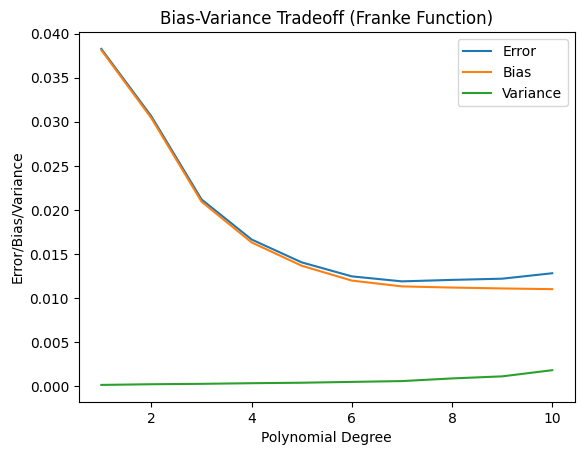

In [479]:
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline

#from 5.4
n_bootstraps = 1000
# Initialize arrays to store error, bias, and variance
maxdegree = len(degrees)+1

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

# Generate data again:
n = 1000
np.random.seed(2024)
x = np.random.rand(n, 1) #creating data
y = np.random.rand(n, 1)
z = FrankeFunction(x, y)  + 0.1 * np.random.randn(n, 1)

XY = np.c_[x, y]

scaler_XY = StandardScaler(with_mean=True, with_std=False)
scaler_Z = StandardScaler(with_mean=True, with_std=False)
XY_scaled = scaler_XY.fit_transform(XY)
z_scaled = scaler_Z.fit_transform(z)

XY_train, XY_test, z_train, z_test = train_test_split(XY_scaled, z_scaled, test_size=0.2, random_state=0)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    z_pred = np.empty((z_test.shape[0], n_bootstraps))  # z pred array to store predictions for each bootstrap sample

    for i in range(n_bootstraps):
        XY_resampled, z_resampled = resample(XY_train, z_train)  #resample
        z_pred[:, i] = model.fit(XY_resampled, z_resampled).predict(XY_test).ravel() 
        
    polydegree[degree] = degree
  
    #calculate the error, bias and variance
    error[degree] = np.mean(np.mean((z_test - z_pred)**2, axis=1, keepdims=True))  # MSE
    bias[degree] = np.mean((z_test - np.mean(z_pred, axis=1, keepdims=True))**2) 
    variance[degree] = np.mean(np.var(z_pred, axis=1, keepdims=True)) 
    
#as I do maxdegree = len(degrees)+1, there is one extra to remove.
polydegree = polydegree[1:]
error = error[1:]
bias = bias[1:]
variance = variance[1:]
# Plotting bias, variance, and error
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='Bias')
plt.plot(polydegree, variance, label='Variance')
plt.title('Bias-Variance Tradeoff (Franke Function)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error/Bias/Variance')
plt.legend()
plt.show()

### Part f):  Cross-validation as resampling techniques, adding more complexity

The aim here is to implement another widely popular
resampling technique, the so-called cross-validation method.  

Implement the $k$-fold cross-validation algorithm (write your own
code or use the functionality of **Scikit-Learn**) and evaluate again the MSE function resulting
from the test folds. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  

In addition to using the ordinary least squares method, you should include both Ridge and Lasso regression.

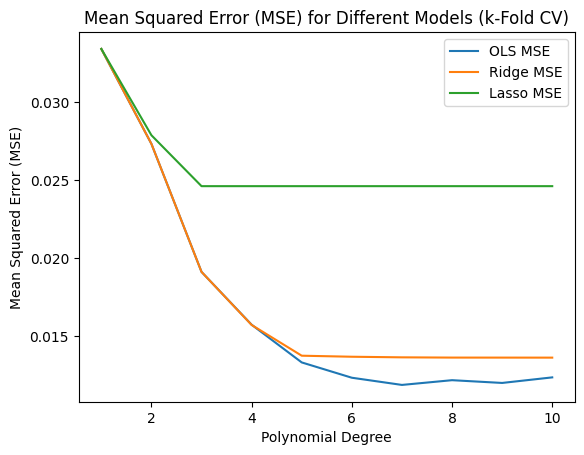

Degree 1: OLS MSE = 0.0334, Ridge MSE = 0.0334, Lasso MSE = 0.0334
Degree 2: OLS MSE = 0.0273, Ridge MSE = 0.0273, Lasso MSE = 0.0279
Degree 3: OLS MSE = 0.0191, Ridge MSE = 0.0191, Lasso MSE = 0.0246
Degree 4: OLS MSE = 0.0157, Ridge MSE = 0.0157, Lasso MSE = 0.0246
Degree 5: OLS MSE = 0.0133, Ridge MSE = 0.0137, Lasso MSE = 0.0246
Degree 6: OLS MSE = 0.0123, Ridge MSE = 0.0137, Lasso MSE = 0.0246
Degree 7: OLS MSE = 0.0119, Ridge MSE = 0.0136, Lasso MSE = 0.0246
Degree 8: OLS MSE = 0.0122, Ridge MSE = 0.0136, Lasso MSE = 0.0246
Degree 9: OLS MSE = 0.0120, Ridge MSE = 0.0136, Lasso MSE = 0.0246
Degree 10: OLS MSE = 0.0123, Ridge MSE = 0.0136, Lasso MSE = 0.0246


In [480]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
#Greate data agian
np.random.seed(2024)
n = 1000
x = np.random.rand(n, 1)
y = np.random.rand(n, 1)
z = FrankeFunction(x, y) + 0.1 * np.random.randn(n, 1)

XY = np.c_[x, y]

# Scaling the design matrix
scaler_XY = StandardScaler(with_mean=True, with_std=False)
scaler_Z = StandardScaler(with_mean=True, with_std=False)
XY_scaled = scaler_XY.fit_transform(XY)
z_scaled = scaler_Z.fit_transform(z)

# Initialize arrays to store the mean squared error for each model
mse_ols = np.zeros(maxdegree)
mse_ridge = np.zeros(maxdegree)
mse_lasso = np.zeros(maxdegree)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=2024)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    XY_poly = poly.fit_transform(XY_scaled)  # design matrix
    
    for train_index, test_index in kf.split(XY_poly):
        XY_train, XY_test = XY_poly[train_index], XY_poly[test_index]
        z_train, z_test = z_scaled[train_index], z_scaled[test_index]

        # Ordinary Least Squares
        model_ols = LinearRegression(fit_intercept=False)
        model_ols.fit(XY_train, z_train)
        z_pred_ols = model_ols.predict(XY_test)
        mse_ols[degree] += mean_squared_error(z_test, z_pred_ols)  # Sum MSE for OLS

        # Ridge Regression
        model_ridge = Ridge(alpha=0.001, fit_intercept=False)
        model_ridge.fit(XY_train, z_train)
        z_pred_ridge = model_ridge.predict(XY_test)
        mse_ridge[degree] += mean_squared_error(z_test, z_pred_ridge)  # Sum MSE for Ridge

        # Lasso Regression
        model_lasso = Lasso(alpha=0.001, fit_intercept=False, max_iter=10000)
        model_lasso.fit(XY_train, z_train)
        z_pred_lasso = model_lasso.predict(XY_test)
        mse_lasso[degree] += mean_squared_error(z_test, z_pred_lasso)  # Sum MSE for Lasso

    # Average the MSE for each model across folds
    mse_ols[degree] /= k_folds
    mse_ridge[degree] /= k_folds
    mse_lasso[degree] /= k_folds

#as I do maxdegree = len(degrees)+1, there is one extra to remove.
mse_ols = mse_ols[1:]
mse_ridge = mse_ridge[1:]
mse_lasso = mse_lasso[1:]

# Plotting MSE for OLS, Ridge, and Lasso
plt.plot(degrees, mse_ols, label='OLS MSE')
plt.plot(degrees, mse_ridge, label='Ridge MSE')
plt.plot(degrees, mse_lasso, label='Lasso MSE')
plt.title('Mean Squared Error (MSE) for Different Models (k-Fold CV)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Output MSE for each degree
for degree in range(0,10):
    print(f"Degree {degree+1}: OLS MSE = {mse_ols[degree]:.4f}, Ridge MSE = {mse_ridge[degree]:.4f}, Lasso MSE = {mse_lasso[degree]:.4f}")


### Part g): Analysis of real data

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises a-f. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2023/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.

Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.

Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).

/var/folders/t7/h_5plwp14mnd8whs39skssnh0000gn/T/ipykernel_35072/2223681970.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('DataFiles/SRTM_data_Norway_1.tif')


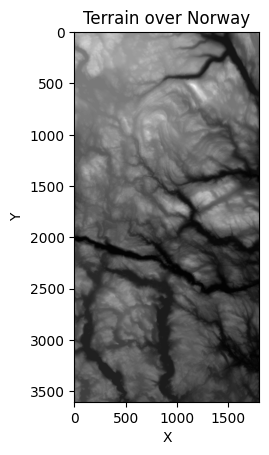

MSE Train: [52279.671600327194, 47783.68961740986, 44621.62314324439, 43399.65588747566, 42614.459455469434, 40367.85047653246, 39059.3845620328, 38407.2862297644, 36239.05567691841, 33405.6925749969]
MSE Test: [52267.80252577854, 47810.27555345168, 44647.15167888342, 43417.884937863935, 42629.014283119395, 40372.20668654433, 39053.3512969413, 38408.50659031119, 36240.56450278484, 33412.417059868676]
R2 Train: [0.4323508645896994, 0.4811679326258984, 0.5155014363611953, 0.5287694741090161, 0.5372950838175667, 0.5616886120372545, 0.5758958463664565, 0.5829762859175026, 0.6065187864921527, 0.6372832512616509]
R2 Test: [0.4327954872740454, 0.4811680855491399, 0.5154939620786048, 0.5288338311596952, 0.5373945697732517, 0.5618852005492494, 0.5761972759085844, 0.5831950605854445, 0.6067213325148413, 0.6374120812120961]


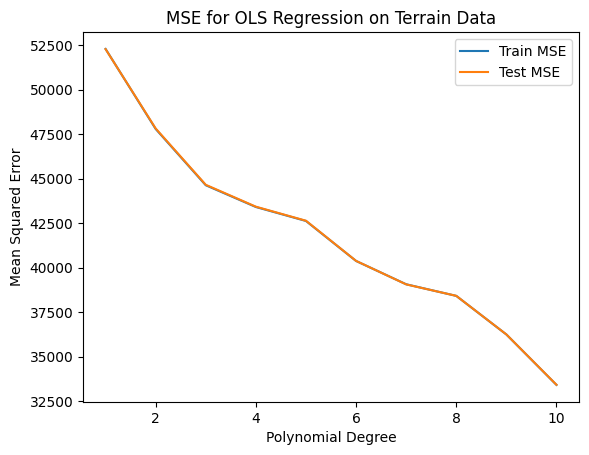

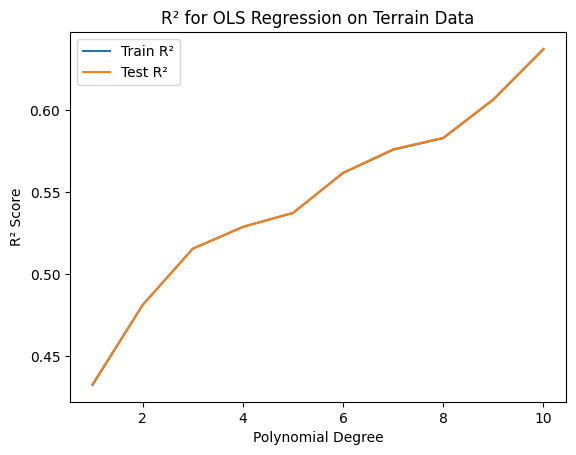

In [488]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

#From the assignment
terrain = imread('DataFiles/SRTM_data_Norway_1.tif')

plt.figure()
plt.imshow(terrain, cmap='gray')
plt.title('Terrain over Norway')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Took about 6-10 minutes to run

x = np.linspace(0, 1, terrain.shape[1])
y = np.linspace(0, 1, terrain.shape[0])
x, y = np.meshgrid(x, y)
X = np.c_[x.ravel(), y.ravel()]  
z = terrain.ravel() 

# Split the data into train and test sets
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2024)

# Polynomial degrees to test
degrees = np.arange(1, 11)

# Containers for performance metrics
mse_train, mse_test, r2_train, r2_test = [], [], [], []

# Loop over polynomial degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Scale the data
    scaler_X = StandardScaler(with_mean=True, with_std=False)
    scaler_z = StandardScaler(with_mean=True, with_std=False)
    X_train_scaled = scaler_X.fit_transform(X_train_poly)
    z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
    X_test_scaled = scaler_X.transform(X_test_poly)
    z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

    # Fit OLS model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train_scaled, z_train_scaled)

    # Predict
    z_train_pred = model.predict(X_train_scaled)
    z_test_pred = model.predict(X_test_scaled)

    # Evaluate MSE and R2
    mse_train.append(mean_squared_error(z_train_scaled, z_train_pred))
    mse_test.append(mean_squared_error(z_test_scaled, z_test_pred))
    r2_train.append(r2_score(z_train_scaled, z_train_pred))
    r2_test.append(r2_score(z_test_scaled, z_test_pred))


print("MSE Train:", mse_train)
print("MSE Test:", mse_test)
print("R2 Train:", r2_train)
print("R2 Test:", r2_test)

# Plot MSE and R² scores
plt.figure()
plt.plot(degrees, mse_train, label='Train MSE')
plt.plot(degrees, mse_test, label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for OLS Regression on Terrain Data')
plt.legend()
plt.show()

plt.figure()
plt.plot(degrees, r2_train, label='Train R²')
plt.plot(degrees, r2_test, label='Test R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² for OLS Regression on Terrain Data')
plt.legend()
plt.show()


## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here.

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. 

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report.

## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.